In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
# 🔹 Chargement des données (fichier sans outliers)
input_path = "../../data/processed/dataset_clean_no_outliers.parquet"
df = pd.read_parquet(input_path)

print("✅ Données chargées :", df.shape)

✅ Données chargées : (366214, 29)


In [11]:
# 🔹 Encodage de 'grade' et 'sub_grade'
grade_order = sorted(df['grade'].dropna().unique())
grade_mapping = {grade: idx + 1 for idx, grade in enumerate(grade_order)}
df['grade_encoded'] = df['grade'].map(grade_mapping)

subgrade_order = sorted(df['sub_grade'].dropna().unique())
subgrade_mapping = {sub: idx + 1 for idx, sub in enumerate(subgrade_order)}
df['sub_grade_encoded'] = df['sub_grade'].map(subgrade_mapping)

print("✅ Encodage de grade et sub_grade terminé.")

# 🔹 Encodage des autres variables catégorielles
df['home_ownership_encoded'] = df['home_ownership'].astype('category').cat.codes
df['verification_status_encoded'] = df['verification_status'].astype('category').cat.codes
df['loan_status_encoded'] = (df['loan_status'] == 'Charged Off').astype(int)
df['purpose_encoded'] = df['purpose'].astype('category').cat.codes
df['initial_list_status_encoded'] = df['initial_list_status'].map({'w': 1, 'f': 0})
df['application_type_encoded'] = df['application_type'].astype('category').cat.codes

print("✅ Encodage des variables catégorielles terminé.")

✅ Encodage de grade et sub_grade terminé.
✅ Encodage des variables catégorielles terminé.


✅ Nombre de variables numériques après préparation : 20

📊 Corrélations avec 'grade_encoded' :
grade_encoded                  1.000000
sub_grade_encoded              0.975964
int_rate                       0.670111
term                           0.460838
revol_util                     0.259502
loan_status_encoded            0.252638
loan_amnt                      0.160866
dti                            0.121920
installment                    0.118813
monthly_payment_calculated     0.109000
pub_rec                        0.069937
pub_rec_bankruptcies           0.064829
open_acc                       0.010824
emp_length                     0.005380
revol_bal                     -0.018629
initial_list_status_encoded   -0.023663
total_acc                     -0.031833
annual_inc                    -0.074531
monthly_income                -0.074531
mort_acc                      -0.075255
Name: grade_encoded, dtype: float64

📊 Corrélations avec 'sub_grade_encoded' :
sub_grade_encoded         

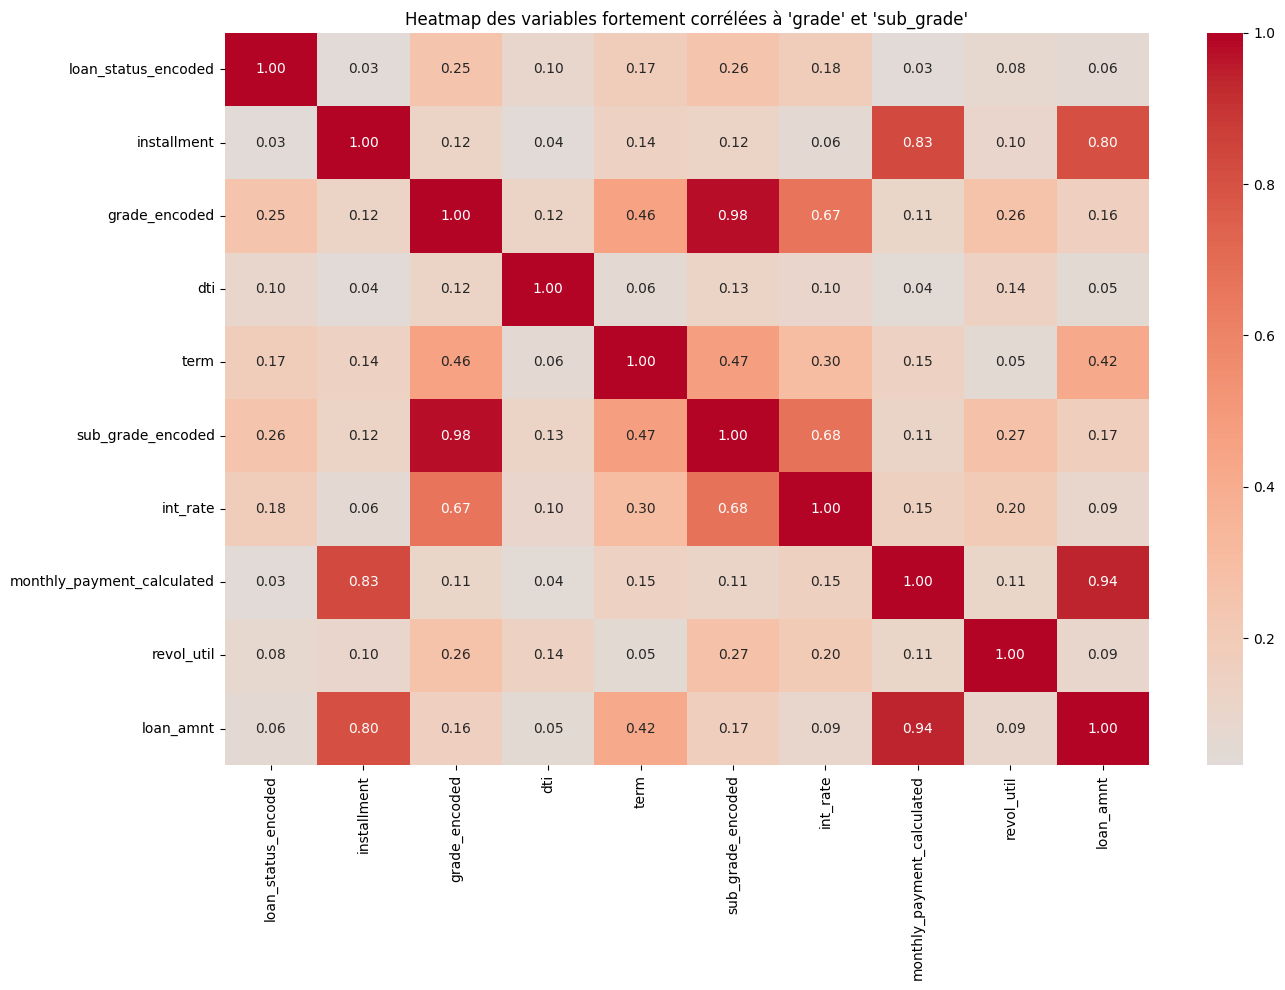

In [12]:
# 🔹 Variables numériques disponibles
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(f"✅ Nombre de variables numériques après préparation : {len(numeric_cols)}")

# 🔹 Corrélations avec grade_encoded
corr_matrix = df[numeric_cols].corr()
corr_with_grade = corr_matrix['grade_encoded'].sort_values(ascending=False)

print("\n📊 Corrélations avec 'grade_encoded' :")
print(corr_with_grade)

# 🔹 Corrélations avec sub_grade_encoded
corr_with_subgrade = corr_matrix['sub_grade_encoded'].sort_values(ascending=False)

print("\n📊 Corrélations avec 'sub_grade_encoded' :")
print(corr_with_subgrade)

# 🔹 Visualisation des corrélations fortes avec grade_encoded
important_features = corr_with_grade[abs(corr_with_grade) > 0.1].index.tolist()
important_features += corr_with_subgrade[abs(corr_with_subgrade) > 0.1].index.tolist()
important_features = list(set(important_features))  # Suppression des doublons

# 🔹 Heatmap des variables importantes
plt.figure(figsize=(14, 10))
sns.heatmap(df[important_features].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap des variables fortement corrélées à 'grade' et 'sub_grade'")
plt.tight_layout()
plt.show()